# 10 Largest Cities in the U.S.
https://www.investopedia.com/articles/personal-finance/050815/top-10-most-developed-cities-us.asp

# Scraping the website

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url="https://www.investopedia.com/articles/personal-finance/050815/top-10-most-developed-cities-us.asp"

In [ ]:
response=requests.get(url)

In [ ]:
print(response)

<Response [200]>


In [ ]:
len(response.text)

358924

In [ ]:
soup=BeautifulSoup(response.content,'html.parser')

In [ ]:
print(soup)

<!DOCTYPE html>

<html class="comp no-js scTemplate html mntl-html" data-ab="99,99,99,70,63,67,66,51,99,99,99,99,99" data-finance-resource-version="1.410.0" data-mantle-resource-version="3.14.318" data-resource-version="1.410.0" data-tracking-container="true" id="scTemplate_1-0" lang="en">
<!--
<globe-environment environment="k8s-prod" application="finance" dataCenter="us-east-1"/>
-->
<head class="loc head">
<script type="text/javascript">var Mntl = window.Mntl || {};</script>
<link href="//js-sec.indexww.com" rel="preconnect"/>
<link href="//c.amazon-adsystem.com" rel="preconnect"/>
<link href="//securepubads.g.doubleclick.net" rel="preconnect"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="max-image-preview:large, NOODP, NOYDIR" name="robots">
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.investopedia.com/articles/personal-finance/050815/top-10-most-developed-cities-us.asp" rel="canoni

In [ ]:
# #list to store the values
# city_name=[]
# population=[]
# median_age=[]
# median_income=[]
# nickname=[]
# tourist_attraction=[]

In [ ]:
header=soup.find_all('h2',class_='comp mntl-sc-block finance-sc-block-heading mntl-sc-block-heading')

In [ ]:
print(header)

[<h2 class="comp mntl-sc-block finance-sc-block-heading mntl-sc-block-heading" id="mntl-sc-block_1-0-8"> <span class="mntl-sc-block-heading__text"> 1. New York </span> </h2>, <h2 class="comp mntl-sc-block finance-sc-block-heading mntl-sc-block-heading" id="mntl-sc-block_1-0-11"> <span class="mntl-sc-block-heading__text"> 2. Los Angeles </span> </h2>, <h2 class="comp mntl-sc-block finance-sc-block-heading mntl-sc-block-heading" id="mntl-sc-block_1-0-14"> <span class="mntl-sc-block-heading__text"> 3. Chicago </span> </h2>, <h2 class="comp mntl-sc-block finance-sc-block-heading mntl-sc-block-heading" id="mntl-sc-block_1-0-19"> <span class="mntl-sc-block-heading__text"> 4. Houston </span> </h2>, <h2 class="comp mntl-sc-block finance-sc-block-heading mntl-sc-block-heading" id="mntl-sc-block_1-0-22"> <span class="mntl-sc-block-heading__text"> 5. Phoenix </span> </h2>, <h2 class="comp mntl-sc-block finance-sc-block-heading mntl-sc-block-heading" id="mntl-sc-block_1-0-25"> <span class="mntl-sc

City name list

In [ ]:
city_name = []
# Loop through the header elements, skipping the last two elements
for city in header[:-2]:
    # Extract the city name by removing the serial number and any leading/trailing spaces
    name = city.find('span', class_='mntl-sc-block-heading__text').text.split('. ')[1].strip()
    # Remove "Calif." if it's present in the city name
    name = name.replace(", Calif", "").strip()
    city_name.append(name)
print(city_name)

['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']


In [ ]:
ul = soup.find_all('ul',class_='comp mntl-sc-block finance-sc-block-html mntl-sc-block-html')
print(ul)

[<ul class="comp mntl-sc-block finance-sc-block-html mntl-sc-block-html" id="mntl-sc-block_1-0-9">
<li><strong>Population</strong>: 8.5 million<span class="ql-inline-citation" data-cite="1"></span></li><li><strong>Population Change Since 2020</strong>: -3.8%</li><li><strong>Median Age</strong>: 38.1 years<span class="ql-inline-citation" data-cite="2"></span></li><li><strong>Median Household Income</strong>: $70,663<span class="ql-inline-citation" data-cite="1"></span></li><li><strong>Median Value of Owner-Occupied Housing Units</strong>: $685,700<span class="ql-inline-citation" data-cite="2"></span></li><li><strong>Nicknames</strong>: The Big Apple, The City That Never Sleeps, The Melting Pot</li><li><strong>Prominent Tourist Attractions</strong>: Statue of Liberty, Empire State Building, Central Park, Broadway, Times Square</li>
</ul>, <ul class="comp mntl-sc-block finance-sc-block-html mntl-sc-block-html" id="mntl-sc-block_1-0-12">
<li><strong>Population</strong>: 3.9 million<span cl

Population List

In [ ]:
population=[]
for pop in ul:
    pop_text = pop.find('li').text
    # Remove non-breaking space characters and split by ': ' or ':'
    pop_no = pop_text.replace('\xa0', ' ').split(': ')
    if len(pop_no) > 1:
        population.append(pop_no[1])
print(population)

['8.5 million', '3.9 million', '2.7 million', '2.3 million', '1.6 million', '1.6 million', '1.5 million', '1.4 million', '1.3 million', '1 million']


Median Age List

In [ ]:
median_age_values = []
# Loop through the <ul> elements
for age in ul:
    # Find all <li> elements within the <ul>
    li_elements = age.find_all('li')
    # Loop through the <li> elements to find the one with the value
    for li in li_elements:
        if "Median Age:" in li.text:
            # Extract the value associated with "Median Age" and add it to the list
            median_age = li.text.split(":")[-1].strip()
            median_age_values.append(median_age)
# Output will be a list of median age values
print(median_age_values)

['38.1 years', '37 years', '35.8 years', '33.7 years', '34.5 years', '35.2 years', '33.9 years', '35.9 years', '33.7 years', '38.4 years']


In [ ]:
median_income = []
# Loop through the <ul> elements
for income in ul:
    # Find all <li> elements within the <ul>
    li_elements_income = income.find_all('li')

    # Loop through the <li> elements to find the one with the value
    for li in li_elements_income:
        if "Median Household Income:" in li.text:
            # Extract the value associated with "Median Age" and add it to the list
            median_household_income = li.text.split(":")[-1].strip()
            median_income.append(median_household_income)
# Output will be a list of median age values
print(median_income)

['$70,663', '$69,778', '$65,781', '$56,019', '$64,927', '$52,649', '$55,084', '$89,457', '$58,231', '$125,075']


In [ ]:
nickname = []
# Loop through the <ul> elements
for name in ul:
    # Find all <li> elements within the <ul>
    li_elements_name = name.find_all('li')
    # Loop through the <li> elements to find the one with the value
    for li in li_elements_name:
        if "Nicknames:" in li.text:
            # Extract the value associated with "Median Age" and add it to the list
            nicknames = li.text.split(":")[-1].strip()
            nickname.append(nicknames)
# Output will be a list of median age values
print(nickname)

['The Big Apple, The City That Never Sleeps, The Melting Pot', 'L.A., La-La Land, City of Angels', 'The Windy City, the City of Big Shoulders, The Second City', 'Space City, H-Town, The Big Heart', 'Valley of the Sun, The Valley', 'Philly, The City of Brotherly Love, The Birthplace of America, The Quaker City', 'Alamo City, Countdown City, River City', 'America’s Finest City, City in Motion, Silicon Beach', 'City of Hate, D-Town, The Metroplex', 'The Capital of Silicon Valley, San Jo']


In [ ]:
city_attractions = []
# Loop through the <ul> elements
for attractions in ul:
    # Find all <li> elements within the <ul>
    li_elements_attractions = attractions.find_all('li')

    # Loop through the <li> elements to find the one with the value
    for li in li_elements_attractions:
        if "Prominent Tourist Attractions:" in li.text:
            # Extract the value associated with "Median Age" and add it to the list
            tourist = li.text.split(":")[-1].strip()
            city_attractions.append(tourist)
# Output will be a list of median age values
print(city_attractions)

['Statue of Liberty, Empire State Building, Central Park, Broadway, Times Square', 'Hollywood, Griffith Observatory, Sunset Boulevard', 'Millennium Park, Willis Tower, Navy Pier', 'Space Center Houston, Hermann Park, Houston Zoo', 'Desert Botanical Garden, Papago Park, South Mountain Park/Preserve', 'Liberty Bell, Independence Hall, Philadelphia Museum of Art', 'The Alamo, San Antonio River Walk, San Antonio Missions National Historical Park', 'Balboa Park, San Diego Zoo, USS Midway Museum', 'Dallas Arboretum and Botanical Garden, Klyde Warren Park, The Dallas World Aquarium', 'San José Museum of Art, California’s Great America, Computer History Museum']


Convert the string values for populations,median income and median age into integers

Population in integer

In [ ]:
values = ['8.5 million', '3.9 million', '2.7 million', '2.3 million', '1.6 million', '1.6 million', '1.5 million', '1.4 million', '1.3 million', '1 million']
population = []
# Loop through the values list and convert each string to an integer
for value in values:
    # Remove the dollar sign and commas, then convert to an integer
    int_value = int(value.replace('million', '').replace('.', ''))
    int_value=int_value*100000
    population.append(int_value)
print(population)

[8500000, 3900000, 2700000, 2300000, 1600000, 1600000, 1500000, 1400000, 1300000, 100000]


Median Income in integer

In [ ]:
values = ['$70,663', '$69,778', '$65,781', '$56,019', '$64,927', '$52,649', '$55,084', '$89,457', '$58,231', '$125,075']
median_income = []
# Loop through the values list and convert each string to an integer
for value in values:
    # Remove the dollar sign and commas, then convert to an integer
    int_value = int(value.replace('$', '').replace(',', ''))
    median_income.append(int_value)
print(median_income)

[70663, 69778, 65781, 56019, 64927, 52649, 55084, 89457, 58231, 125075]


Median Age in integer

In [ ]:
values = ['38.1 years', '37 years', '35.8 years', '33.7 years', '34.5 years', '35.2 years', '33.9 years', '35.9 years', '33.7 years', '38.4 years']
median_age = []
# Loop through the values list and round off the decimal part while removing "years"
for value in values:
    # Extract the numeric part, round it, and convert to an integer
    numeric_part = float(value.split(' ')[0])
    rounded_numeric_part = round(numeric_part)
    median_age.append(rounded_numeric_part)
print(median_age)

[38, 37, 36, 34, 34, 35, 34, 36, 34, 38]


# EDA

In [ ]:
print(city_name)
print(population)
print(median_age)
print(median_income)
print(nickname)
print(city_attractions)

['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
[8500000, 3900000, 2700000, 2300000, 1600000, 1600000, 1500000, 1400000, 1300000, 100000]
[38, 37, 36, 34, 34, 35, 34, 36, 34, 38]
[70663, 69778, 65781, 56019, 64927, 52649, 55084, 89457, 58231, 125075]
['The Big Apple, The City That Never Sleeps, The Melting Pot', 'L.A., La-La Land, City of Angels', 'The Windy City, the City of Big Shoulders, The Second City', 'Space City, H-Town, The Big Heart', 'Valley of the Sun, The Valley', 'Philly, The City of Brotherly Love, The Birthplace of America, The Quaker City', 'Alamo City, Countdown City, River City', 'America’s Finest City, City in Motion, Silicon Beach', 'City of Hate, D-Town, The Metroplex', 'The Capital of Silicon Valley, San Jo']
['Statue of Liberty, Empire State Building, Central Park, Broadway, Times Square', 'Hollywood, Griffith Observatory, Sunset Boulevard', 'Millennium Park, Willis Tower, Navy Pier',

Creating the data frame

In [ ]:
import pandas as pd

In [ ]:
data = {
    'City Name' : city_name,
    'Population' : population,
    'Median Age' : median_age,
    'Median Income' : median_income,
    'Nicknames' : nickname,
    'Tourist Attractions' : city_attractions
}

In [ ]:
usa = pd.DataFrame(data,index=[1,2,3,4,5,6,7,8,9,10])

In [ ]:
usa

,City Name,Population,Median Age,Median Income,Nicknames,Tourist Attractions
1,New York,8500000,38,70663,"The Big Apple, The City That Never Sleeps, The...","Statue of Liberty, Empire State Building, Cent..."
2,Los Angeles,3900000,37,69778,"L.A., La-La Land, City of Angels","Hollywood, Griffith Observatory, Sunset Boulevard"
3,Chicago,2700000,36,65781,"The Windy City, the City of Big Shoulders, The...","Millennium Park, Willis Tower, Navy Pier"
4,Houston,2300000,34,56019,"Space City, H-Town, The Big Heart","Space Center Houston, Hermann Park, Houston Zoo"
5,Phoenix,1600000,34,64927,"Valley of the Sun, The Valley","Desert Botanical Garden, Papago Park, South Mo..."
6,Philadelphia,1600000,35,52649,"Philly, The City of Brotherly Love, The Birthp...","Liberty Bell, Independence Hall, Philadelphia ..."
7,San Antonio,1500000,34,55084,"Alamo City, Countdown City, River City","The Alamo, San Antonio River Walk, San Antonio..."
8,San Diego,1400000,36,89457,"America’s Finest City, City in Motion, Silicon...","Balboa Park, San Diego Zoo, USS Midway Museum"
9,Dallas,1300000,34,58231,"City of Hate, D-Town, The Metroplex","Dallas Arboretum and Botanical Garden, Klyde W..."
10,San Jose,100000,38,125075,"The Capital of Silicon Valley, San Jo","San José Museum of Art, California’s Great Ame..."


# Basic info eda operations

In [ ]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City Name            10 non-null     object
 1   Population           10 non-null     int64 
 2   Median Age           10 non-null     int64 
 3   Median Income        10 non-null     int64 
 4   Nicknames            10 non-null     object
 5   Tourist Attractions  10 non-null     object
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [ ]:
usa.head()

,City Name,Population,Median Age,Median Income,Nicknames,Tourist Attractions
1,New York,8500000,38,70663,"The Big Apple, The City That Never Sleeps, The...","Statue of Liberty, Empire State Building, Cent..."
2,Los Angeles,3900000,37,69778,"L.A., La-La Land, City of Angels","Hollywood, Griffith Observatory, Sunset Boulevard"
3,Chicago,2700000,36,65781,"The Windy City, the City of Big Shoulders, The...","Millennium Park, Willis Tower, Navy Pier"
4,Houston,2300000,34,56019,"Space City, H-Town, The Big Heart","Space Center Houston, Hermann Park, Houston Zoo"
5,Phoenix,1600000,34,64927,"Valley of the Sun, The Valley","Desert Botanical Garden, Papago Park, South Mo..."


In [ ]:
usa.tail()

,City Name,Population,Median Age,Median Income,Nicknames,Tourist Attractions
6,Philadelphia,1600000,35,52649,"Philly, The City of Brotherly Love, The Birthp...","Liberty Bell, Independence Hall, Philadelphia ..."
7,San Antonio,1500000,34,55084,"Alamo City, Countdown City, River City","The Alamo, San Antonio River Walk, San Antonio..."
8,San Diego,1400000,36,89457,"America’s Finest City, City in Motion, Silicon...","Balboa Park, San Diego Zoo, USS Midway Museum"
9,Dallas,1300000,34,58231,"City of Hate, D-Town, The Metroplex","Dallas Arboretum and Botanical Garden, Klyde W..."
10,San Jose,100000,38,125075,"The Capital of Silicon Valley, San Jo","San José Museum of Art, California’s Great Ame..."


In [ ]:
usa.describe()

,Population,Median Age,Median Income
count,1.000000e+01,10.000000,10.000000
mean,2.490000e+06,35.600000,70766.400000
std,2.334976e+06,1.646545,21877.189811
min,1.000000e+05,34.000000,52649.000000
25%,1.425000e+06,34.000000,56572.000000
50%,1.600000e+06,35.500000,65354.000000
75%,2.600000e+06,36.750000,70441.750000
max,8.500000e+06,38.000000,125075.000000


In [ ]:
usa.isna()
usa.isnull()

,City Name,Population,Median Age,Median Income,Nicknames,Tourist Attractions
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False
10,False,False,False,False,False,False


# Visualisation

In [ ]:
import plotly.express as px

Comparison of population of 10 largest cities

In [ ]:
#bar plot
fig=px.bar(usa,x='City Name',y='Population',title='Population of 10 largest cities of USA')
fig.update_xaxes(title_text='City')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_x=0.5)
fig.show()

Median Age vs Median Income

In [ ]:
#scatter plot
fig = px.scatter(usa, x='Median Income', y='Median Age', text='City Name', hover_name='City Name',
                 size_max=30, color='City Name', opacity=0.7)
fig.update_xaxes(title_text='Median Income')
fig.update_yaxes(title_text='Median Age')
fig.update_layout(title_text='Median Income vs. Median Age (Scatter Plot)',
                  showlegend=False,
                  hovermode='closest')
fig.update_traces(textposition='top center')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_x=0.5)
fig.show()


1. Which are the top 5 largest cities in US?

In [ ]:
usa_sorted=usa.sort_values(by='Population',ascending=False)
top_5_largest=usa_sorted.head(5)

In [ ]:
fig=px.bar(top_5_largest,x='City Name',y='Population',title='Top 5 Largest Cities in the US population wise')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title_x=0.5)
fig.show()

2. Which city has the highest income followed by the others?

In [ ]:
fig = px.pie(usa, names='City Name', values='Median Income', title='Median Income by City')
fig.show()

Income per population

In [ ]:
import plotly.graph_objs as go
usa['Population to Median Income Ratio'] = usa['Population'] / usa['Median Income']
bar_chart = go.Bar(x=usa['City Name'], y=usa['Population to Median Income Ratio'], name='Population to Median Income Ratio')
midpoints = [sum(x) for x in zip(usa['Population to Median Income Ratio'], [0] * len(usa['Population to Median Income Ratio']))]
line_chart = go.Scatter(x=usa['City Name'], y=midpoints, mode='lines', name='Midpoint')
layout = go.Layout(title='Population to Median Income Ratio with Midpoints', xaxis=dict(tickangle=45))
fig = go.Figure(data=[bar_chart, line_chart], layout=layout)
fig.show()

This graph shows that more the height of the bar lower is the income per population

Wordcloud for nicknames

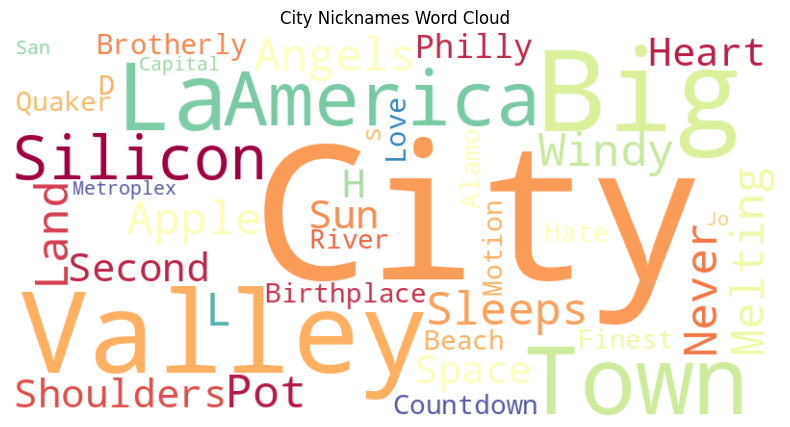

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Assuming you have a DataFrame named 'usa' with your data
nicknames_text = ' '.join(usa['Nicknames'])
# Customize the appearance of the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Spectral',  # You can change the colormap to a different color scheme
    max_words=100,  # Limit the number of displayed words
    contour_width=1,
    contour_color='black',  # Add a black border around words for better visibility
).generate(nicknames_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("City Nicknames Word Cloud")
plt.show()
